<a href="https://colab.research.google.com/github/amirebm/Advanced_C-_excercises/blob/master/CAPSTONE_PROJECT_Airemiles_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Introduction to Time Series Forecasting/CAPSTONE PROJECT - Airmiles

/content/drive/MyDrive/Colab Notebooks/Introduction to Time Series Forecasting/CAPSTONE PROJECT - Airmiles


In [5]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [6]:
#Load the data
df_daily= pd.read_csv("airmiles.csv",index_col="Date",parse_dates=True,dayfirst=True)
df_daily.head(13)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


In [7]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


#Time Series Index

In [8]:
df_daily.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq=None)

In [9]:
# index - Set it to the start of the month
df_daily=df_daily.asfreq('MS')
df_daily.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [10]:
df_daily.head(13)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


<Axes: title={'center': 'Monthly Air Miles'}, xlabel='Date'>

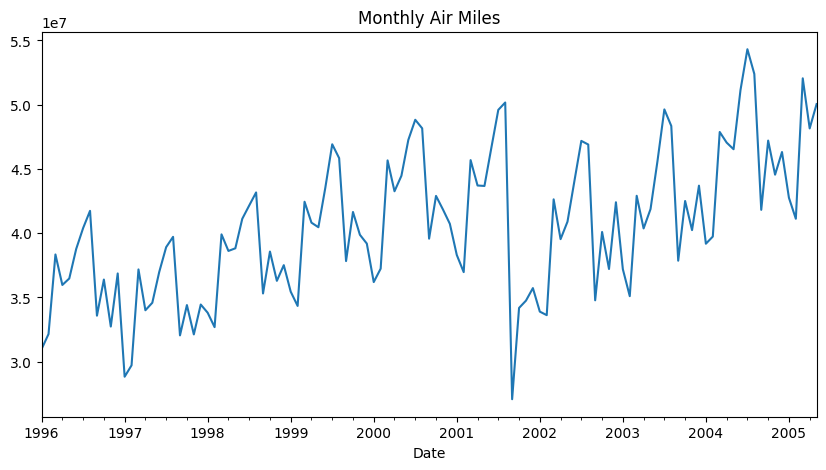

In [11]:
df_daily['airmiles'].plot(figsize=(10,5),title='Monthly Air Miles')

<Axes: xlabel='Date'>

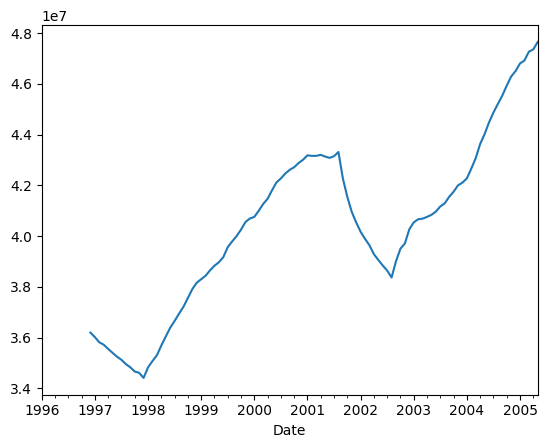

In [12]:
df_daily['airmiles'].rolling(12).mean().plot()

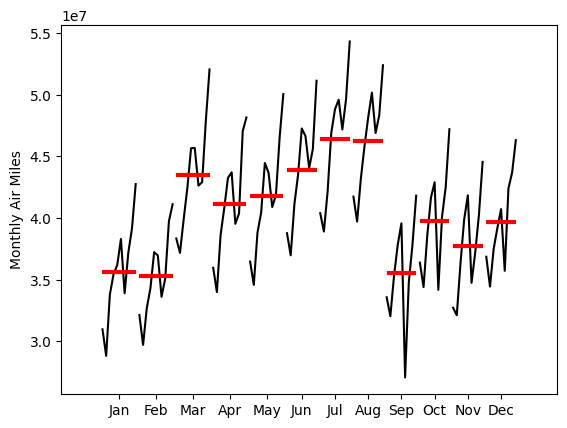

In [13]:
#plotting the monthly seasonality
month_plot(df_daily['airmiles'],ylabel='Monthly Air Miles')
plt.show()


/tmp/ipython-input-14-4038997337.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_daily['airmiles'].resample('Q').mean(),ylabel='Quarterly Air Miles')


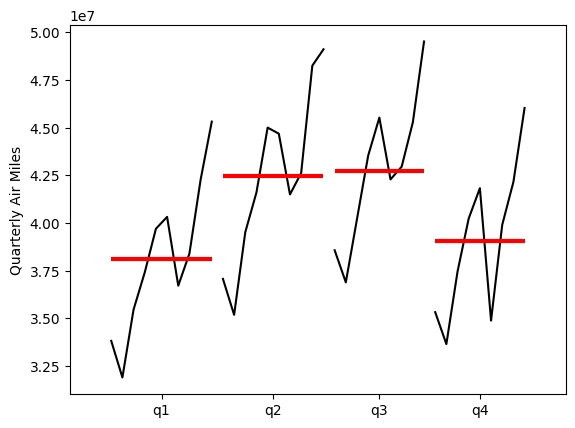

In [14]:
#plotting the qaurterly seasonality
quarter_plot(df_daily['airmiles'].resample('Q').mean(),ylabel='Quarterly Air Miles')
plt.show()

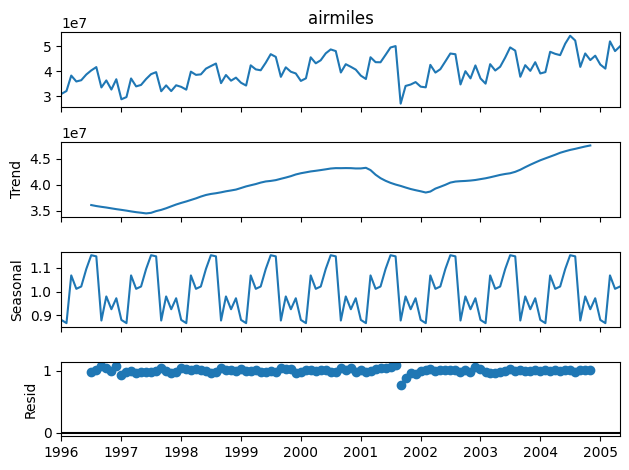

In [15]:
#Seasonal Decomposition plot for Air Miles
seasonal_decompose(df_daily['airmiles'],model='mul',period=12).plot()
plt.show()

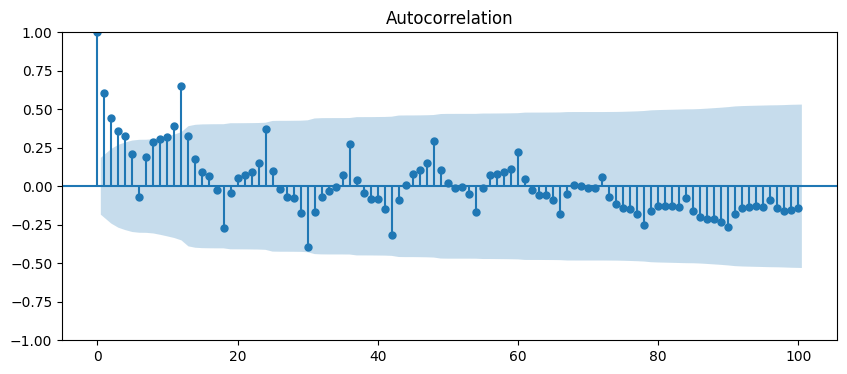

In [16]:
#plot the autocorrelation (ACF)
fig , ax =plt.subplots(figsize=(10,4))
plot_acf(df_daily['airmiles'],lags=100,ax=ax)
plt.show()

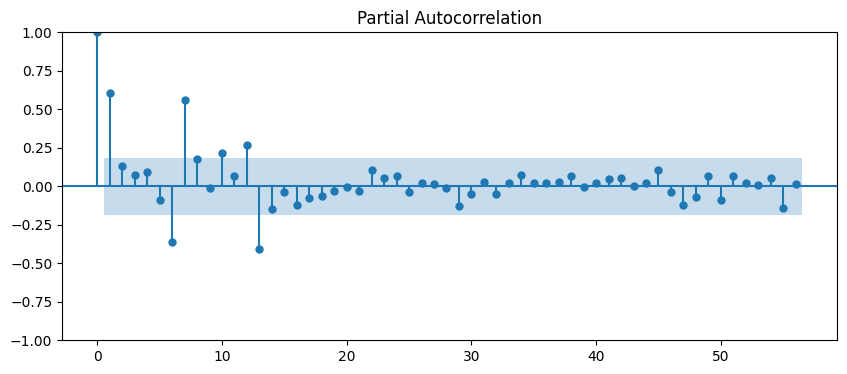

In [17]:
#plot the autocorrelation (ACF)
fig , ax =plt.subplots(figsize=(10,4))
plot_pacf(df_daily['airmiles'],lags=56,ax=ax)
plt.show()

In [18]:
#train and test split
train , test = df_daily.iloc[:-12,:],df_daily.iloc[-12:,:]
test

,airmiles
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665
2004-11-01,44553653
2004-12-01,46316602
2005-01-01,42760657
2005-02-01,41120838


In [24]:
#holt-winters model
model=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
predictions=model.forecast(12)
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,0
2004-06-01,4.989814e+07
2004-07-01,5.232020e+07
2004-08-01,5.246731e+07
2004-09-01,4.147231e+07
2004-10-01,4.632250e+07
2004-11-01,4.366543e+07
2004-12-01,4.583298e+07
2005-01-01,4.142760e+07
2005-02-01,4.104454e+07
2005-03-01,5.053423e+07


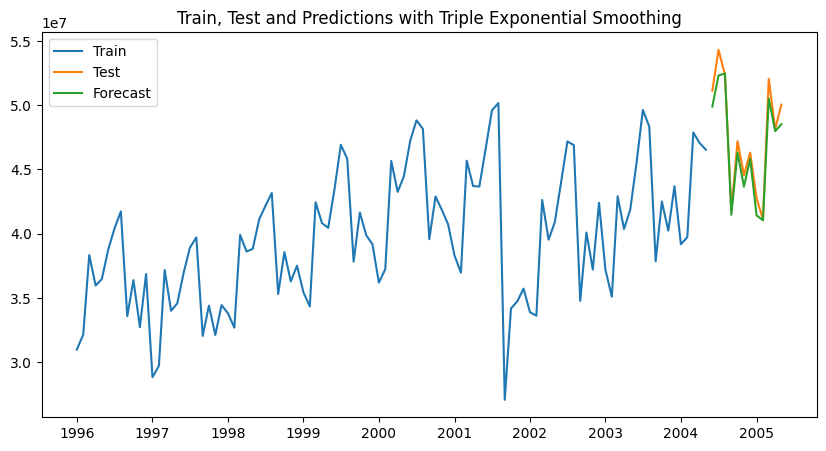

MAE: 877575.16
RMSE: 1075653.07
MAPE: 1.80 %


In [25]:
#function to assess model and visualize output
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

def model_assessment(train,test,predictions,chart_title):
  #plot training,test and forecasts
  plt.figure(figsize=(10,5))
  plt.plot(train,label='Train')
  plt.plot(test,label='Test')
  plt.plot(predictions,label='Forecast')
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  mse = mean_squared_error(test, predictions)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(test, predictions)
  mape=mean_absolute_percentage_error(test,predictions)

  print(f"MAE: {mae:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"MAPE: {100 * mape:.2f} %")

  # model_assessment(train,test,simple_prediction,'Simple Exponential Smoothing')
  # model_assessment(train,test,double_prediction,'Double Exponential Smoothing')
model_assessment(train,test,predictions,'Triple Exponential Smoothing')

In [34]:
#holt-winters model
model=ExponentialSmoothing(df_daily['airmiles'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
predictions=model.forecast(12)
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,0
2005-06-01,5.317705e+07
2005-07-01,5.585684e+07
2005-08-01,5.559980e+07
2005-09-01,4.374628e+07
2005-10-01,4.922822e+07
2005-11-01,4.655935e+07
2005-12-01,4.885796e+07
2006-01-01,4.429477e+07
2006-02-01,4.367190e+07
2006-03-01,5.397746e+07


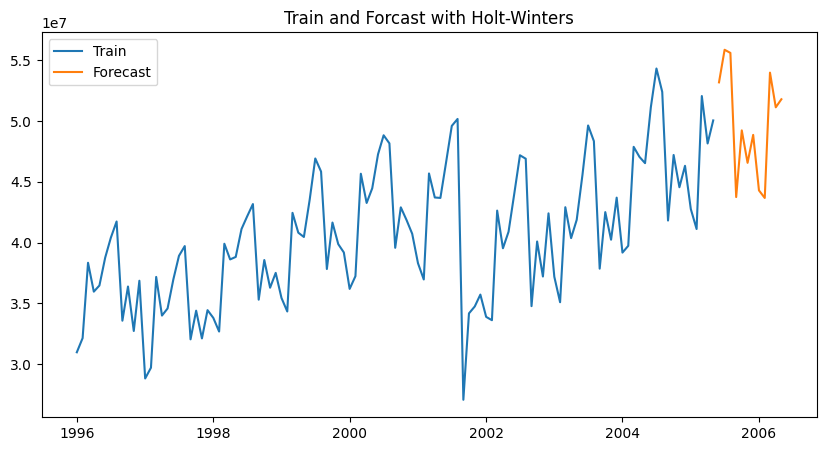

In [37]:
def plot_forecast(df,forecast,chart_title):
  #plot training, test, and forcasts in Tiple exponential smoothing
  plt.figure(figsize=(10,5))
  plt.plot(df,label='Train')
  plt.plot(forecast,label='Forecast')
  plt.title(f'Train and Forcast with {chart_title}')
  plt.legend()
  plt.show()

plot_forecast(df_daily['airmiles'],predictions,'Holt-Winters')

In [26]:
configs = [
    ('add', 'add'),
    ('add', 'mul'),
    ('mul', 'add'),
    ('mul', 'mul')
]

for trend, seasonal in configs:
    model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=7).fit()
    forecast = model.forecast(len(test))
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mape=mean_absolute_percentage_error(test,predictions)
    print(f"{trend}-{seasonal} → RMSE: {rmse}")
    print(f"{trend}-{seasonal} → MAPE: {100 * mape:.2f} %")



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


add-add → RMSE: 4306419.100457565
add-add → MAPE: 1.80 %
add-mul → RMSE: 4254215.001667647
add-mul → MAPE: 1.80 %
mul-add → RMSE: 4349881.119373824
mul-add → MAPE: 1.80 %
mul-mul → RMSE: 4309846.872693322
mul-mul → MAPE: 1.80 %


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


KeyError: 'Close'

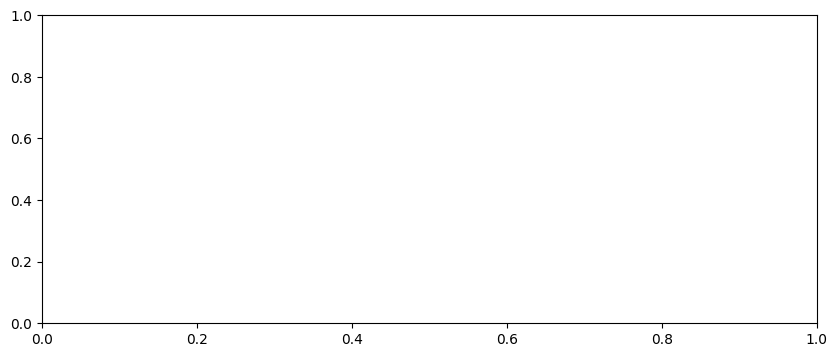

In [22]:
#plot the autocorrelation (ACF)
fig , ax =plt.subplots(figsize=(10,4))
plot_acf(df_daily['Close'],lags=100,ax=ax)
plt.show()

In [ ]:
#plot the autocorrelation (ACF)
fig , ax =plt.subplots(figsize=(10,20))
plot_pacf(df_daily['Close'],lags=100,ax=ax)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
df_diff = df_daily['Close'].diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_diff, lags=50, ax=ax[0])
plot_pacf(df_diff, lags=50, ax=ax[1])
plt.show()


In [ ]:
df.complaints.plot(figsize=(10,5),title='Weekly Customer Complaints')
plt.show()

In [ ]:
#plot training, test, and forcasts in Tiple exponential smoothing
df.complaints.plot(figsize=(10,4),title='Weekly Customer Complaints')
plt.figure(figsize=(10,4))
plt.plot(df.complaints,label='Train')
plt.plot(forecast,label='Triple Exponential Forecast')
plt.title('Train and Forcast with Triple Exponential Smoothing ')
plt.legend()